In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<h4>Problem 1</h4>

In [2]:
bank_df=pd.read_csv("E:/MyCourses/CSC478ProgrammingMachineLearning/bank_data.csv", sep=',')
bank_df

,id,age,income,children,gender,region,married,car,savings_acct,current_acct,mortgage,pep
0,ID12101,48,17546.00,1,FEMALE,INNER_CITY,NO,NO,NO,NO,NO,YES
1,ID12102,40,30085.10,3,MALE,TOWN,YES,YES,NO,YES,YES,NO
2,ID12103,51,16575.40,0,FEMALE,INNER_CITY,YES,YES,YES,YES,NO,NO
3,ID12104,23,20375.40,3,FEMALE,TOWN,YES,NO,NO,YES,NO,NO
4,ID12105,57,50576.30,0,FEMALE,RURAL,YES,NO,YES,NO,NO,NO
...,...,...,...,...,...,...,...,...,...,...,...,...
595,ID12696,61,47025.00,2,FEMALE,INNER_CITY,NO,YES,YES,YES,YES,NO
596,ID12697,30,9672.25,0,FEMALE,INNER_CITY,YES,YES,YES,YES,NO,NO
597,ID12698,31,15976.30,0,FEMALE,TOWN,YES,YES,YES,NO,NO,YES
598,ID12699,29,14711.80,0,MALE,INNER_CITY,YES,NO,YES,NO,YES,NO


In [3]:
bank_df.dtypes

id               object
age               int64
income          float64
children          int64
gender           object
region           object
married          object
car              object
savings_acct     object
current_acct     object
mortgage         object
pep              object
dtype: object

In [4]:
print("Mean of numeric data: \n")
print(bank_df[["age","income","children"]].mean())
print("\n")
print("Standard Deviations of numeric data: \n")
print(bank_df[["age","income","children"]].std())

Mean of numeric data: 

age            42.395000
income      27524.031217
children        1.011667
dtype: float64


Standard Deviations of numeric data: 

age            14.424947
income      12899.468246
children        1.056752
dtype: float64


In [5]:
bank_df.describe()

,age,income,children
count,600.000000,600.000000,600.000000
mean,42.395000,27524.031217,1.011667
std,14.424947,12899.468246,1.056752
min,18.000000,5014.210000,0.000000
25%,30.000000,17264.500000,0.000000
50%,42.000000,24925.300000,1.000000
75%,55.250000,36172.675000,2.000000
max,67.000000,63130.100000,3.000000


In [6]:
#count one categorical attribute
region_counts=bank_df.region.value_counts()
region_counts

INNER_CITY    269
TOWN          173
RURAL          96
SUBURBAN       62
Name: region, dtype: int64

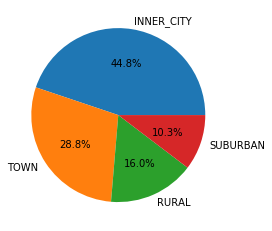

In [7]:
#bank_df.region.value_counts().plot(kind='pie')
plt.pie(region_counts, labels=region_counts.index, autopct='%.1f%%')
plt.show()

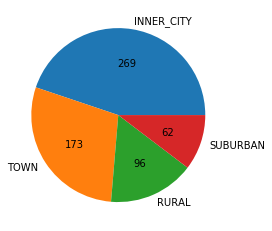

In [8]:
# show real counts
def func(pct,allvals):
    absolute = int(round(pct/100.*np.sum(allvals)))
    return "{:d}".format(absolute)

plt.pie(region_counts, labels=region_counts.index, autopct=lambda pct: func(pct,region_counts))
plt.show()

In [9]:
#count all categorical attributes at the same time
bank_df.loc[:, ~bank_df.columns.isin(['id','age', 'income','children'])].apply(pd.Series.value_counts)

,gender,region,married,car,savings_acct,current_acct,mortgage,pep
FEMALE,300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
INNER_CITY,NaN,269.0,NaN,NaN,NaN,NaN,NaN,NaN
MALE,300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NO,NaN,NaN,204.0,304.0,186.0,145.0,391.0,326.0
RURAL,NaN,96.0,NaN,NaN,NaN,NaN,NaN,NaN
SUBURBAN,NaN,62.0,NaN,NaN,NaN,NaN,NaN,NaN
TOWN,NaN,173.0,NaN,NaN,NaN,NaN,NaN,NaN
YES,NaN,NaN,396.0,296.0,414.0,455.0,209.0,274.0


<b>distribution of region count</b>

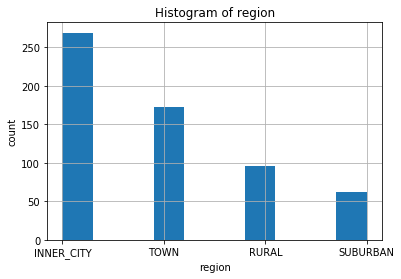

In [10]:
plt.hist(bank_df["region"])
plt.xlabel('region')
plt.ylabel("count")
plt.title("Histogram of region")
plt.grid(True)

<h4>Problem 2</h4>

In [11]:
pep_yes= bank_df.pep =='YES'
pep_yes_group=bank_df[pep_yes]
print("pep_yes_group summary: ")
pep_yes_group.describe()

pep_yes_group summary: 


,age,income,children
count,274.000000,274.000000,274.000000
mean,45.127737,30644.919453,0.945255
std,14.327991,13609.613043,0.860571
min,18.000000,7756.360000,0.000000
25%,34.000000,19639.475000,0.000000
50%,45.000000,28080.050000,1.000000
75%,58.000000,38458.350000,1.000000
max,67.000000,63130.100000,3.000000


In [12]:
pep_no= bank_df.pep =='NO'
pep_no_group=bank_df[pep_no]
print("pep_no_group summary: ")
pep_no_group.describe()

pep_no_group summary: 


,age,income,children
count,326.000000,326.000000,326.000000
mean,40.098160,24900.953374,1.067485
std,14.123506,11661.123422,1.195524
min,18.000000,5014.210000,0.000000
25%,27.000000,15366.475000,0.000000
50%,40.000000,23105.000000,0.000000
75%,51.000000,31210.900000,2.000000
max,67.000000,61554.600000,3.000000


In [13]:
#another way of looking at the mean
bank_df.groupby("pep").mean()

,age,income,children
pep,,,
NO,40.098160,24900.953374,1.067485
YES,45.127737,30644.919453,0.945255


<h4>Problem 3</h4>

In [14]:
#we can calcuate z-score by ourselves
income_z1=np.array((bank_df.income-bank_df.income.mean())/bank_df.income.std(ddof=0))
income_z1

array([-0.77416809,  0.19870631, -0.84947428, -0.5546427 ,  1.78856234,
        0.80268432, -1.4467666 , -0.19997582, -0.17222286, -0.25696366,
        2.50450652, -0.06713092, -0.91461654,  2.1476672 , -0.6245333 ,
       -0.40205184, -0.75990755,  1.04680487, -0.04770307, -0.38803182,
        2.35529071, -0.85553384,  0.84745217, -0.92990123, -1.1547879 ,
        1.04820144, -0.52094655, -0.57492401,  0.14237796, -0.2524636 ,
       -0.35543741, -0.86884006, -0.31662051,  0.18599751,  0.77570723,
       -0.59401047, -1.28570088, -1.09731902, -0.69981622, -0.16545725,
       -0.05817735, -0.04433578,  2.18737636,  0.00368297, -1.06946519,
        1.95105333, -1.10485274, -1.11860896,  0.93289126, -0.7492393 ,
       -1.02526373, -0.2815821 , -0.87396858,  0.17612841,  2.27473961,
        1.57593445, -0.19757838, -0.34131653, -0.9605482 , -0.16989524,
       -0.21419757,  0.70332608, -0.03890467, -1.22771216, -1.74647532,
       -0.78626394, -1.29283891,  0.57173033, -0.63008079, -1.32

In [15]:
# we can also use scipy.stats lib
from scipy import stats
income_z2=stats.zscore(bank_df.income, axis=0)
income_z2

array([-0.77416809,  0.19870631, -0.84947428, -0.5546427 ,  1.78856234,
        0.80268432, -1.4467666 , -0.19997582, -0.17222286, -0.25696366,
        2.50450652, -0.06713092, -0.91461654,  2.1476672 , -0.6245333 ,
       -0.40205184, -0.75990755,  1.04680487, -0.04770307, -0.38803182,
        2.35529071, -0.85553384,  0.84745217, -0.92990123, -1.1547879 ,
        1.04820144, -0.52094655, -0.57492401,  0.14237796, -0.2524636 ,
       -0.35543741, -0.86884006, -0.31662051,  0.18599751,  0.77570723,
       -0.59401047, -1.28570088, -1.09731902, -0.69981622, -0.16545725,
       -0.05817735, -0.04433578,  2.18737636,  0.00368297, -1.06946519,
        1.95105333, -1.10485274, -1.11860896,  0.93289126, -0.7492393 ,
       -1.02526373, -0.2815821 , -0.87396858,  0.17612841,  2.27473961,
        1.57593445, -0.19757838, -0.34131653, -0.9605482 , -0.16989524,
       -0.21419757,  0.70332608, -0.03890467, -1.22771216, -1.74647532,
       -0.78626394, -1.29283891,  0.57173033, -0.63008079, -1.32

<h4>Problem 4</h4>

In [16]:
age_group_auto=pd.qcut(bank_df.age,3)
age_group_auto

0        (35.0, 49.0]
1        (35.0, 49.0]
2        (49.0, 67.0]
3      (17.999, 35.0]
4        (49.0, 67.0]
            ...      
595      (49.0, 67.0]
596    (17.999, 35.0]
597    (17.999, 35.0]
598    (17.999, 35.0]
599      (35.0, 49.0]
Name: age, Length: 600, dtype: category
Categories (3, interval[float64]): [(17.999, 35.0] < (35.0, 49.0] < (49.0, 67.0]]

In [17]:
age_group_selfdefined=pd.qcut(bank_df.age, [0, .33, .66, 1], labels=["young","middle_age","old"])
age_group_selfdefined.head(10)

0    middle_age
1    middle_age
2           old
3         young
4           old
5           old
6         young
7           old
8    middle_age
9           old
Name: age, dtype: category
Categories (3, object): [young < middle_age < old]

<h4>Problem 5</h4>

In [18]:
#normaling numeric attributes all together
bank_numeric=bank_df[["income","age","children"]]
bank_numberic_minmax=(bank_numeric-bank_numeric.min())/bank_numeric.max()
bank_numberic_minmax

,income,age,children
0,0.198507,0.447761,0.333333
1,0.397131,0.328358,1.000000
2,0.183133,0.492537,0.000000
3,0.243326,0.074627,1.000000
4,0.721717,0.582090,0.000000
...,...,...,...
595,0.665464,0.641791,0.666667
596,0.073785,0.179104,0.000000
597,0.173643,0.194030,0.000000
598,0.153613,0.164179,0.000000


<h4>Problem6</h4>

In [19]:
numeric_corr_matrix=bank_numberic_minmax.corr()
numeric_corr_matrix

,income,age,children
income,1.000000,0.752726,0.036761
age,0.752726,1.000000,0.023572
children,0.036761,0.023572,1.000000


<h4>Problem 7</h>

In [20]:
bank_df_temp=bank_df.copy()
bank_df_temp[["income","age","children"]]=bank_numberic_minmax
bank_dummy_df=pd.get_dummies(bank_df_temp.loc[:,bank_df.columns!='id'])
bank_dummy_df

,age,income,children,gender_FEMALE,gender_MALE,region_INNER_CITY,region_RURAL,region_SUBURBAN,region_TOWN,married_NO,...,car_NO,car_YES,savings_acct_NO,savings_acct_YES,current_acct_NO,current_acct_YES,mortgage_NO,mortgage_YES,pep_NO,pep_YES
0,0.447761,0.198507,0.333333,1,0,1,0,0,0,1,...,1,0,1,0,1,0,1,0,0,1
1,0.328358,0.397131,1.000000,0,1,0,0,0,1,0,...,0,1,1,0,0,1,0,1,1,0
2,0.492537,0.183133,0.000000,1,0,1,0,0,0,0,...,0,1,0,1,0,1,1,0,1,0
3,0.074627,0.243326,1.000000,1,0,0,0,0,1,0,...,1,0,1,0,0,1,1,0,1,0
4,0.582090,0.721717,0.000000,1,0,0,1,0,0,0,...,1,0,0,1,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,0.641791,0.665464,0.666667,1,0,1,0,0,0,1,...,0,1,0,1,0,1,0,1,1,0
596,0.179104,0.073785,0.000000,1,0,1,0,0,0,0,...,0,1,0,1,0,1,1,0,1,0
597,0.194030,0.173643,0.000000,1,0,0,0,0,1,0,...,0,1,0,1,1,0,1,0,0,1
598,0.164179,0.153613,0.000000,0,1,1,0,0,0,0,...,1,0,0,1,1,0,0,1,1,0


In [21]:
bank_dummy_df.to_csv (r'E:\MyCourses\CSC478ProgrammingMachineLearning\bank_numeric.csv', index = False, header=True)

<h4>Problem 8</h4>

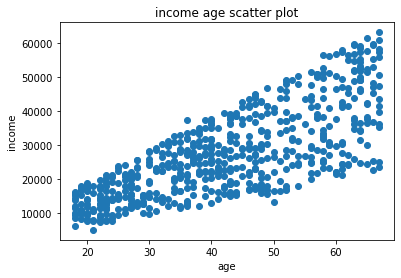

In [22]:
plt.scatter(bank_df.age,bank_df.income)
plt.xlabel('age')
plt.ylabel('income')
plt.title("income age scatter plot")
plt.show()

<h4>Problem 9</h4>

(array([ 40., 125., 120., 112.,  65.,  58.,  36.,  28.,  16.]),
 array([ 5014.21      , 11471.53111111, 17928.85222222, 24386.17333333,
        30843.49444444, 37300.81555556, 43758.13666667, 50215.45777778,
        56672.77888889, 63130.1       ]),
 <a list of 9 Patch objects>)

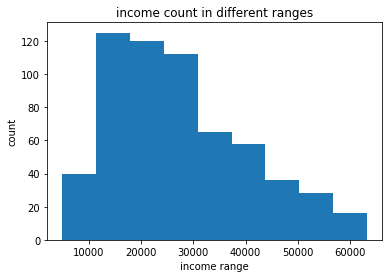

In [23]:
plt.xlabel('income range')
plt.ylabel('count')
plt.title("income count in different ranges")
plt.hist(bank_df.income, bins=9)

<h4>Problem 10</h4>

<BarContainer object of 4 artists>

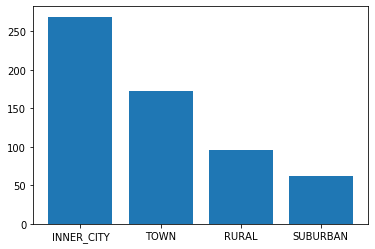

In [24]:
region_counts=bank_df.region.value_counts()
plt.bar(region_counts.index, region_counts)

<h4>Problem 11</h4>

In [25]:
pep_counts_by_region=bank_df.groupby("region").pep.value_counts()
pep_counts_by_region

region      pep
INNER_CITY  NO     146
            YES    123
RURAL       NO      50
            YES     46
SUBURBAN    YES     34
            NO      28
TOWN        NO     102
            YES     71
Name: pep, dtype: int64

In [26]:
#using pands crosstab
crosstab=pd.crosstab(bank_df.region,bank_df.pep)
crosstab

pep,NO,YES
region,,
INNER_CITY,146,123
RURAL,50,46
SUBURBAN,28,34
TOWN,102,71


In [27]:
N=4
ind=np.arange(N)
width=0.2

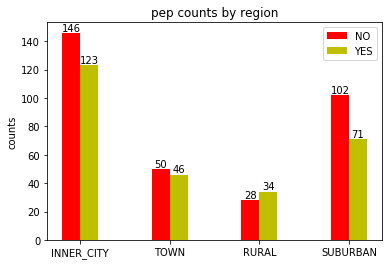

In [28]:
fig, ax=plt.subplots()
rects1=ax.bar(ind,crosstab.NO,width,color='r')
rects2=ax.bar(ind+width,crosstab.YES,width,color='y')
ax.set_ylabel('counts')
ax.set_title('pep counts by region')
ax.set_xticks(ind+width/2)
ax.set_xticklabels(bank_df.region.unique())

ax.legend((rects1[0],rects2[0]),('NO','YES'))

def autolabel(rects):
    """
    attach the count of each column on the top
    """
    for rect in rects:
        height=rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2.,height,'%d'%int(height),
               ha='center',va='bottom')

autolabel(rects1)
autolabel(rects2)
plt.show()